# WeatherPy

---

## Starter Code to Generate Geographic Coordinates and a List of Cities

In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import OpenWeatherMaps API key
from api_keys import open_weather_key

# Import citipy to determine cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by using the citipy Library

In [13]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 583


---

## Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [41]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city
    # city_url =
    params = {"q":city,
              "appid":open_weather_key}
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url, params=params).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = lat = city_weather['coord']['lat']
        city_lng = lon = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | minas de marcona
Processing Record 2 of Set 1 | loukhi
Processing Record 3 of Set 1 | petropavlovsk-kamchatsky
Processing Record 4 of Set 1 | howard springs
Processing Record 5 of Set 1 | port elizabeth
Processing Record 6 of Set 1 | taiohae
City not found. Skipping...
Processing Record 7 of Set 1 | ursulo galvan
Processing Record 8 of Set 1 | karatau
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | tofol
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | thompson
Processing Record 13 of Set 1 | aitape
Processing Record 14 of Set 1 | puerto natales
Processing Record 15 of Set 1 | grytviken
Processing Record 16 of Set 1 | gereida
Processing Record 17 of Set 1 | dudinka
Processing Record 18 of Set 1 | bayanhongor
Processing Record 19 of Set 1 | cockburn town
Processing Record 20 of Set 1 | glace bay
Processing Record 21 of Set 1 | ilha de mocamb

Processing Record 42 of Set 4 | tralee
Processing Record 43 of Set 4 | senanga
Processing Record 44 of Set 4 | harstad
Processing Record 45 of Set 4 | saint-felix-de-valois
Processing Record 46 of Set 4 | cocachacra
Processing Record 47 of Set 4 | cabo san lucas
Processing Record 48 of Set 4 | greenville
Processing Record 49 of Set 4 | yurga
Processing Record 50 of Set 4 | rengali
Processing Record 1 of Set 5 | college
Processing Record 2 of Set 5 | grand falls-windsor
Processing Record 3 of Set 5 | tura
Processing Record 4 of Set 5 | richards bay
Processing Record 5 of Set 5 | constantia
Processing Record 6 of Set 5 | abomsa
Processing Record 7 of Set 5 | vorkuta
Processing Record 8 of Set 5 | kurumkan
Processing Record 9 of Set 5 | kununurra
Processing Record 10 of Set 5 | island harbour
Processing Record 11 of Set 5 | nova vicosa
Processing Record 12 of Set 5 | bafoulabe
Processing Record 13 of Set 5 | brigantine
Processing Record 14 of Set 5 | lorengau
Processing Record 15 of Set 5

Processing Record 31 of Set 8 | saint-louis
Processing Record 32 of Set 8 | banket
Processing Record 33 of Set 8 | kasese
Processing Record 34 of Set 8 | diphu
Processing Record 35 of Set 8 | kidal
Processing Record 36 of Set 8 | banda aceh
Processing Record 37 of Set 8 | novokazalinsk
City not found. Skipping...
Processing Record 38 of Set 8 | chernyshevskiy
Processing Record 39 of Set 8 | happy valley-goose bay
Processing Record 40 of Set 8 | bondowoso
Processing Record 41 of Set 8 | morrope
Processing Record 42 of Set 8 | zaozersk
Processing Record 43 of Set 8 | kavaratti
Processing Record 44 of Set 8 | kuanda
Processing Record 45 of Set 8 | posse
Processing Record 46 of Set 8 | omuthiya
City not found. Skipping...
Processing Record 47 of Set 8 | labuan
Processing Record 48 of Set 8 | hermanus
Processing Record 49 of Set 8 | cassia
Processing Record 50 of Set 8 | basoko
Processing Record 1 of Set 9 | geraldton
Processing Record 2 of Set 9 | borba
Processing Record 3 of Set 9 | broom

Processing Record 19 of Set 12 | malaya vishera
Processing Record 20 of Set 12 | bolama
Processing Record 21 of Set 12 | lafayette
Processing Record 22 of Set 12 | san pedro pochutla
Processing Record 23 of Set 12 | aliwal north
Processing Record 24 of Set 12 | tual
Processing Record 25 of Set 12 | dharur
Processing Record 26 of Set 12 | ambovombe
Processing Record 27 of Set 12 | flying fish cove
Processing Record 28 of Set 12 | guerrero negro
Processing Record 29 of Set 12 | kralendijk
Processing Record 30 of Set 12 | illizi
Processing Record 31 of Set 12 | diebougou
Processing Record 32 of Set 12 | daru
Processing Record 33 of Set 12 | minab
-----------------------------
Data Retrieval Complete      
-----------------------------


In [44]:
# Convert stored cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Display record count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [45]:
# Display cities weather DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,minas de marcona,-15.2119,-75.1103,295.61,63,30,7.34,PE,1706819935
1,loukhi,66.0764,33.0381,269.10,80,73,7.18,RU,1706820052
2,petropavlovsk-kamchatsky,53.0452,158.6483,258.48,86,75,3.00,RU,1706820025
3,howard springs,-12.4970,131.0470,301.10,95,100,4.06,AU,1706820053
4,port elizabeth,-33.9180,25.5701,295.55,95,75,7.20,ZA,1706820054


In [46]:
# Export city_data into a .csv file
city_data_df.to_csv("../output_data/cities.csv", index_label="City ID")

In [13]:
# Read in saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City ID")

city_data_df["Max Temp"] = city_data_df["Max Temp"] - 273.15

# Display read in .csv converted to DataFrame
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,minas de marcona,-15.2119,-75.1103,22.46,63,30,7.34,PE,1706819935
1,loukhi,66.0764,33.0381,-4.05,80,73,7.18,RU,1706820052
2,petropavlovsk-kamchatsky,53.0452,158.6483,-14.67,86,75,3.00,RU,1706820025
3,howard springs,-12.4970,131.0470,27.95,95,100,4.06,AU,1706820053
4,port elizabeth,-33.9180,25.5701,22.40,95,75,7.20,ZA,1706820054


### Create the Scatter Plots

#### Latitude Vs. Temperature

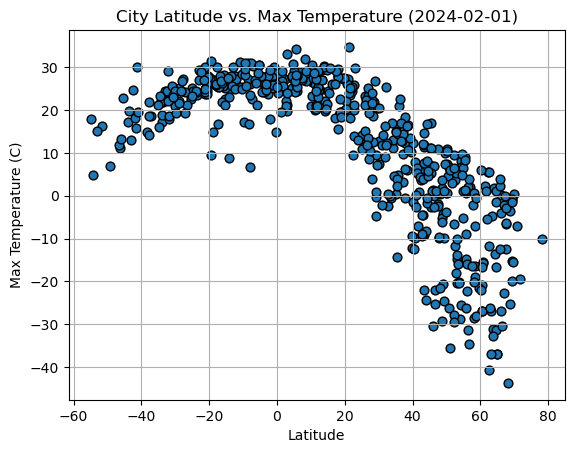

In [22]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", title="City Latitude vs. Max Temperature (2024-02-01)",
                  xlabel="Latitude", ylabel="Max Temperature (C)", edgecolors="black", s=40, grid=True)

plt.show()

In [11]:
time.ctime(city_data_df.iloc[1,8])

'Thu Feb  1 14:40:52 2024'

#### Latitude Vs. Humidity

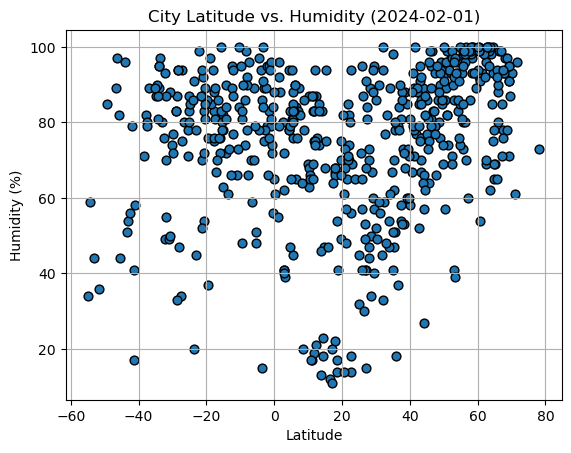

In [23]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", title="City Latitude vs. Humidity (2024-02-01)",
                  xlabel="Latitude", ylabel="Humidity (%)", edgecolors="black", s=40, grid=True)

plt.show()

#### Latitude Vs. Cloudiness

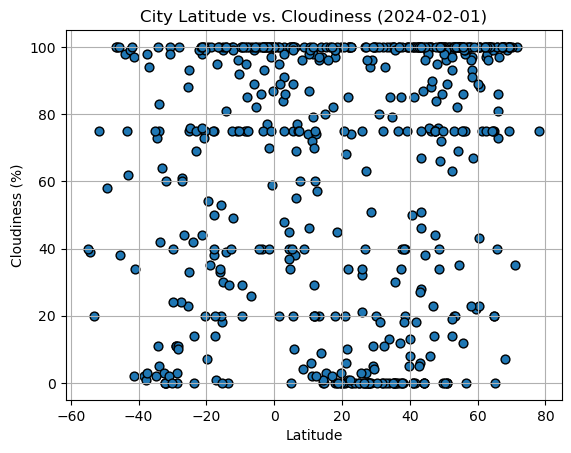

In [24]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", title="City Latitude vs. Cloudiness (2024-02-01)",
                  xlabel="Latitude", ylabel="Cloudiness (%)", edgecolors="black", s=40, grid=True)

plt.show()

#### Latitude Vs. Wind Speed Plot

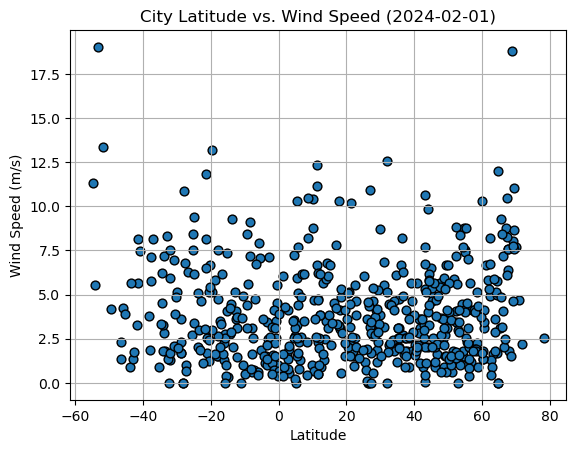

In [25]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", title="City Latitude vs. Wind Speed (2024-02-01)",
                  xlabel="Latitude", ylabel="Wind Speed (m/s)", edgecolors="black", s=40, grid=True)

plt.show()

---

## Compute Linear Regression for Each Relationship

In [26]:
# Define function to create Linear Regression plots
regression_values = (slope * x_values) + intercept

regression_line = f"y = {slope}x + {intercept}"

NameError: name 'slope' is not defined

In [27]:
# Create a DataFrame with the Northern Hemisphere data
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
1,loukhi,66.0764,33.0381,-4.05,80,73,7.18,RU,1706820052
2,petropavlovsk-kamchatsky,53.0452,158.6483,-14.67,86,75,3.00,RU,1706820025
5,ursulo galvan,22.7333,-98.3000,25.84,56,74,3.85,MX,1706820054
6,karatau,43.1667,70.4667,-4.42,76,28,10.64,KZ,1706820055
8,tofol,5.3248,163.0078,27.77,81,100,5.97,FM,1706820056


In [28]:
# Create a DataFrame with the Southern Hemisphere data
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City ID,,,,,,,,,
0,minas de marcona,-15.2119,-75.1103,22.46,63,30,7.34,PE,1706819935
3,howard springs,-12.4970,131.0470,27.95,95,100,4.06,AU,1706820053
4,port elizabeth,-33.9180,25.5701,22.40,95,75,7.20,ZA,1706820054
7,port-aux-francais,-49.3500,70.2167,6.83,85,58,4.17,TF,1706820055
9,waitangi,-43.9535,-176.5597,17.12,96,98,0.89,NZ,1706820380


### Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.6636982030519527


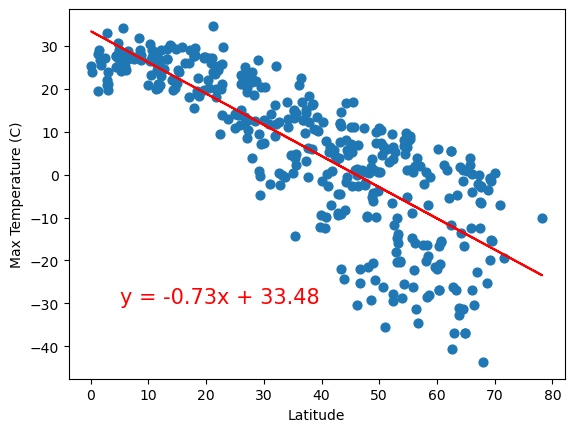

In [38]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp",
                  xlabel="Latitude", ylabel="Max Temperature (C)", s=40)

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)

regression_values = (slope * x_values) + intercept
regression_line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.plot(x_values, regression_values, color="red")
plt.annotate(text=regression_line, xy=(5, -30), size=15, color="red")

print(f"The r-value is: {rvalues**2}")

plt.show()

The r-value is: 0.3000437443186322


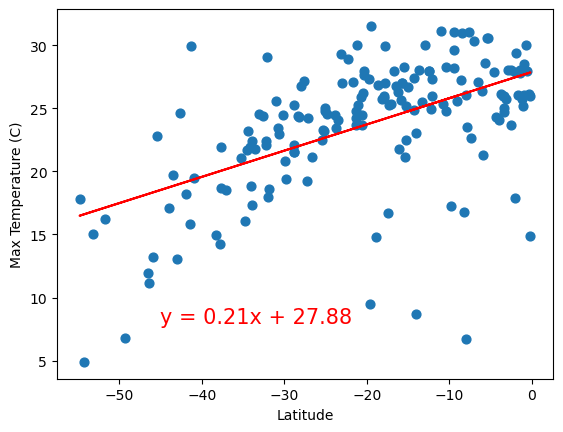

In [44]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Max Temp",
                  xlabel="Latitude", ylabel="Max Temperature (C)", s=40)

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)

regression_values = (slope * x_values) + intercept
regression_line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.plot(x_values, regression_values, color="red")
plt.annotate(text=regression_line, xy=(-45, 8), size=15, color="red")

print(f"The r-value is: {rvalues**2}")

plt.show()

**Linear Relationship Analysis:** blah blah blah words

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.18033449214849204


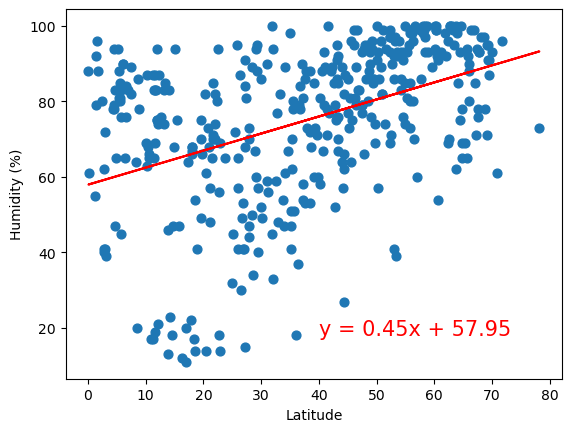

In [47]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Humidity",
                  xlabel="Latitude", ylabel="Humidity (%)", s=40)

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)

regression_values = (slope * x_values) + intercept
regression_line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.plot(x_values, regression_values, color="red")
plt.annotate(text=regression_line, xy=(40, 18), size=15, color="red")

print(f"The r-value is: {rvalues**2}")

plt.show()

The r-value is: 0.05268632531444139


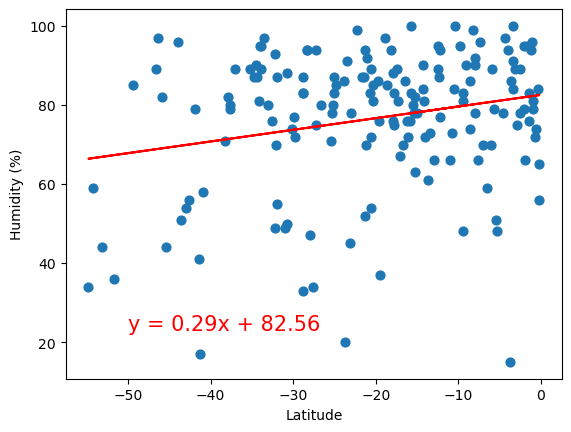

In [51]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Humidity",
                  xlabel="Latitude", ylabel="Humidity (%)", s=40)

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)

regression_values = (slope * x_values) + intercept
regression_line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.plot(x_values, regression_values, color="red")
plt.annotate(text=regression_line, xy=(-50, 23), size=15, color="red")

print(f"The r-value is: {rvalues**2}")

plt.show()

**Linear Relationship Analysis:** blah blah

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.05173038857152221


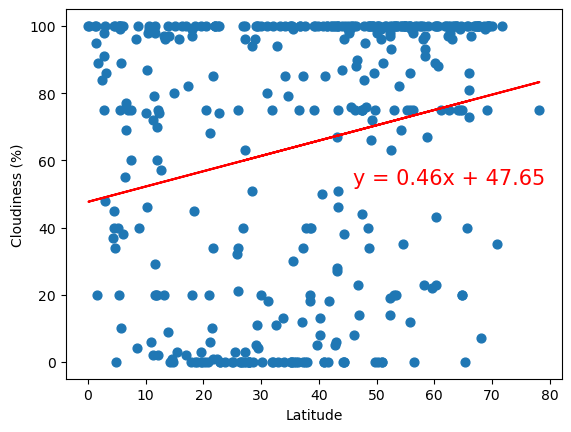

In [55]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Cloudiness",
                  xlabel="Latitude", ylabel="Cloudiness (%)", s=40)

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)

regression_values = (slope * x_values) + intercept
regression_line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.plot(x_values, regression_values, color="red")
plt.annotate(text=regression_line, xy=(46, 53), size=15, color="red")

print(f"The r-value is: {rvalues**2}")

plt.show()

The r-value is: 0.113030663156958


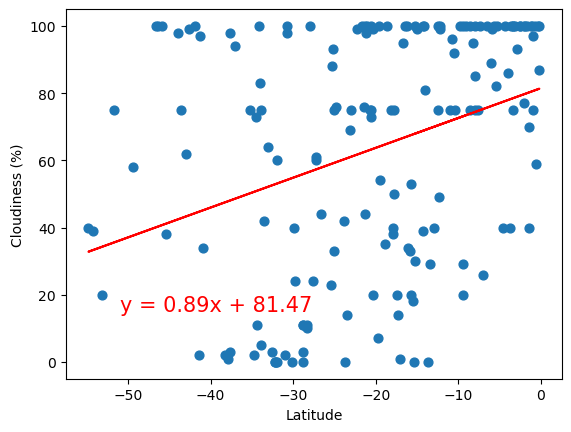

In [61]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Cloudiness",
                  xlabel="Latitude", ylabel="Cloudiness (%)", s=40)

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)

regression_values = (slope * x_values) + intercept
regression_line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.plot(x_values, regression_values, color="red")
plt.annotate(text=regression_line, xy=(-51, 15), size=15, color="red")

print(f"The r-value is: {rvalues**2}")

plt.show()

**Linear Relationship Analysis:** blah blah

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.013713660470086278


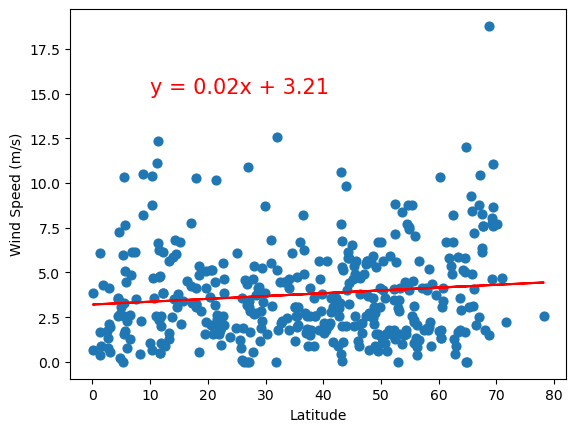

In [64]:
# Linear regression on Northern Hemisphere
northern_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed",
                  xlabel="Latitude", ylabel="Wind Speed (m/s)", s=40)

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)

regression_values = (slope * x_values) + intercept
regression_line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.plot(x_values, regression_values, color="red")
plt.annotate(text=regression_line, xy=(10, 15), size=15, color="red")

print(f"The r-value is: {rvalues**2}")

plt.show()

The r-value is: 0.08597691577640598


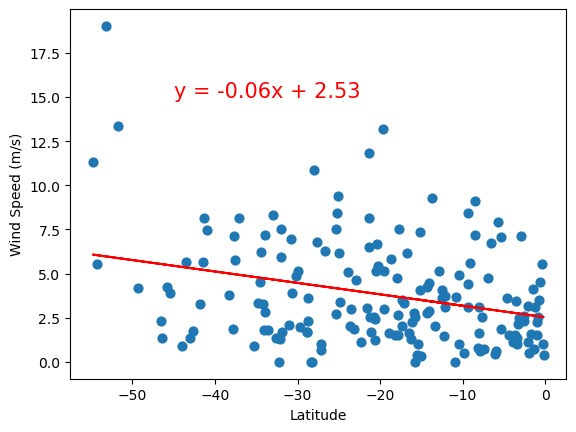

In [67]:
# Linear regression on Southern Hemisphere
southern_hemi_df.plot(kind="scatter", x="Lat", y="Wind Speed",
                  xlabel="Latitude", ylabel="Wind Speed (m/s)", s=40)

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalues, pvalues, stderr) = linregress(x_values, y_values)

regression_values = (slope * x_values) + intercept
regression_line = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.plot(x_values, regression_values, color="red")
plt.annotate(text=regression_line, xy=(-45, 15), size=15, color="red")

print(f"The r-value is: {rvalues**2}")

plt.show()

**Linear Relationship Analysis:** blah blah